<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Iris

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [9]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

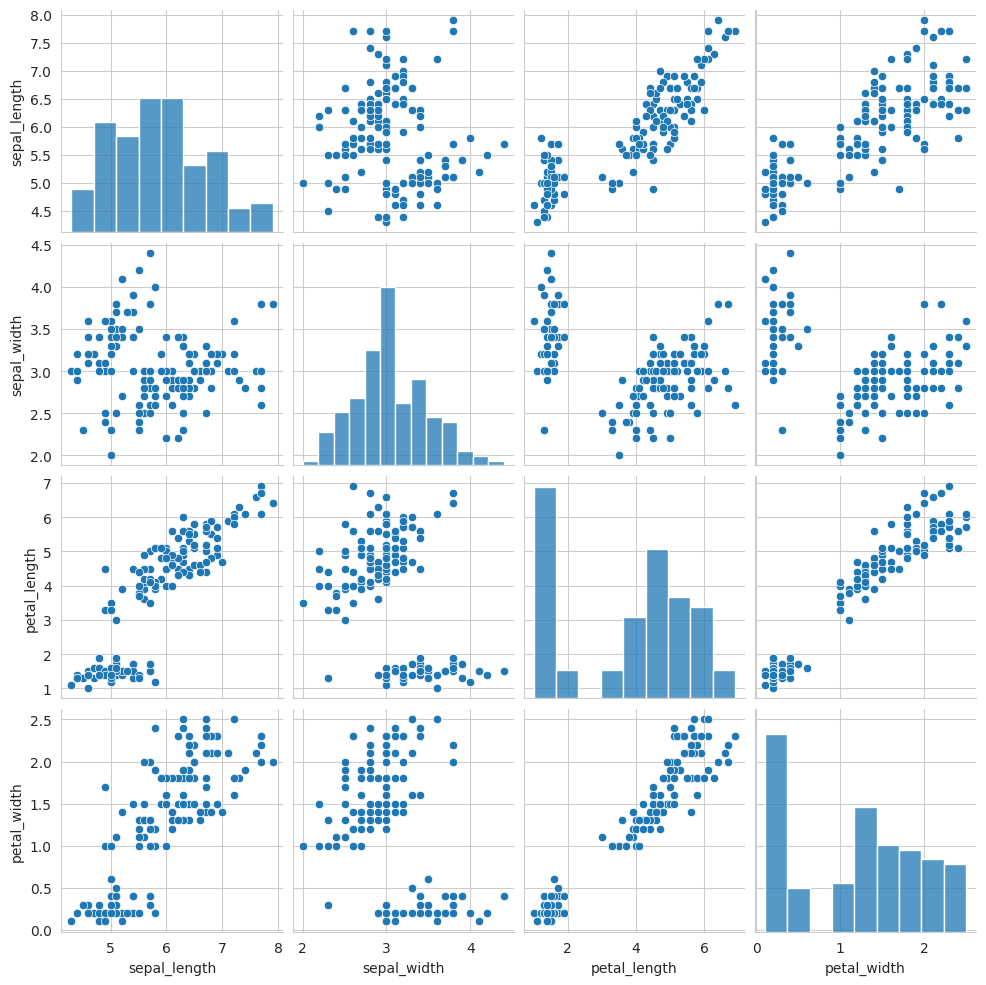

In [12]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris)

**Comentário:**

- sepal_length: comprimento da sépala
- sepal_width: largura da sépala
- petal_length: comprimento da pétala
- petal_width: largura da pétala

-> Análise

- Na diagononal encontraremos os histogramas que representa a distribuição da variável correspondente; já os demais são gráficos de dispersão (scatter plots), que compara pares de variáveis;
- petal_length e petal_width: quanto maior o comprimento da pétala, maior sua largura e isso é útil na classificação das flores;
- sepal_length e petal_length: flores com sépalas mais longas tendem a ter pétalas mais longas;
- sepal_width: os gráficos que a envolvem mostram dispersão maior, indicando pouca correlação com as demais variáveis.

## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [13]:
# resposta da questão 2.1

# Verificando valores nulos
iris.isnull().sum()

# Ao encontrá-los, preenchemos com a média
iris = iris.fillna(iris.mean())

### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [14]:
# resposta da questão 2.2

from sklearn.preprocessing import StandardScaler

# Selecionando as variáveis numéricas
numerical_columns = iris.select_dtypes(include=['float64']).columns

# Padronizando as variáveis numéricas
scaler = StandardScaler()
iris[numerical_columns + '_std'] = scaler.fit_transform(iris[numerical_columns])

### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [15]:
# resposta da questão 2.3

# Removendo as colunas originais e mantendo as escaladas
iris = iris.drop(columns=numerical_columns)

## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [16]:
# resposta da questão 3.1

from sklearn.cluster import KMeans

wcss = [] #armazenar a soma dos quadrados das distâncias dos pontos de dados até o centro do cluster mais próximo (inércia)
for i in range(1, 11): #definindo os 10 modelos
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=123)
    kmeans.fit(iris[numerical_columns + '_std']) #_std indica que os dados foram normalizados
    wcss.append(kmeans.inertia_) #medida da soma dos quadrados das distâncias dos pontos de dados até o centróide do cluster mais próximo. Quanto menor a inércia, mais coesos são os clusters

#n_clusters=i: Define o número de clusters que o modelo deve criar
#init='k-means++': Especifica o método de inicialização dos centróides
#max_iter=300: Define o número máximo de iterações para cada execução do K-Means
#n_init=10: Executa o algoritmo 10 vezes com diferentes inicializações de centróides e seleciona o melhor resultado (aquele com a menor inércia)

### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

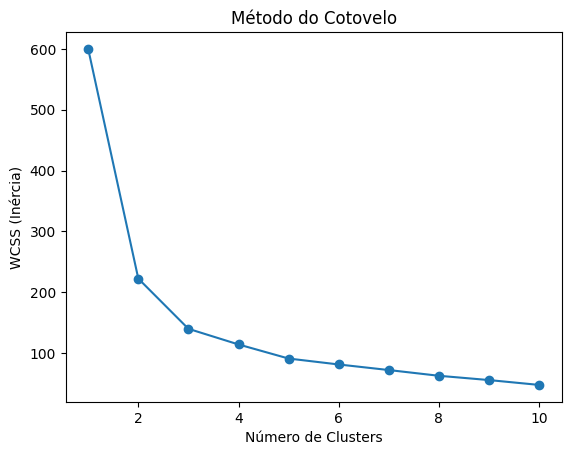

In [21]:
# resposta da questão 3.2

import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Inércia)')
plt.show()

O gráfico mostra o método do cotovelo, que ajuda a determinar o número ideal de clusters para o algoritmo K-Means

- O eixo X representa o número de clusters (k);
- O eixo Y representa o WCSS, que mede a soma das distâncias quadradas entre os pontos e seus centróides;
- Verificamos diminuição no WCSS conforme k aumenta, até que a redução se estabiliza;
- O "cotovelo" é o ponto onde a diminuição do WCSS começa a desacelerar e isso acontecer em K=3, indicando que que três clusters são um bom número para segmentar os dados, o que faz sentido se considerarmos que po dataset tem 3 espécies;

### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [18]:
# resposta da questão 3.3.a

# Ajustando k-médias para 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=123) #dve ser criado 3 clusters
iris['cluster'] = kmeans.fit_predict(iris[numerical_columns + '_std'])

**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

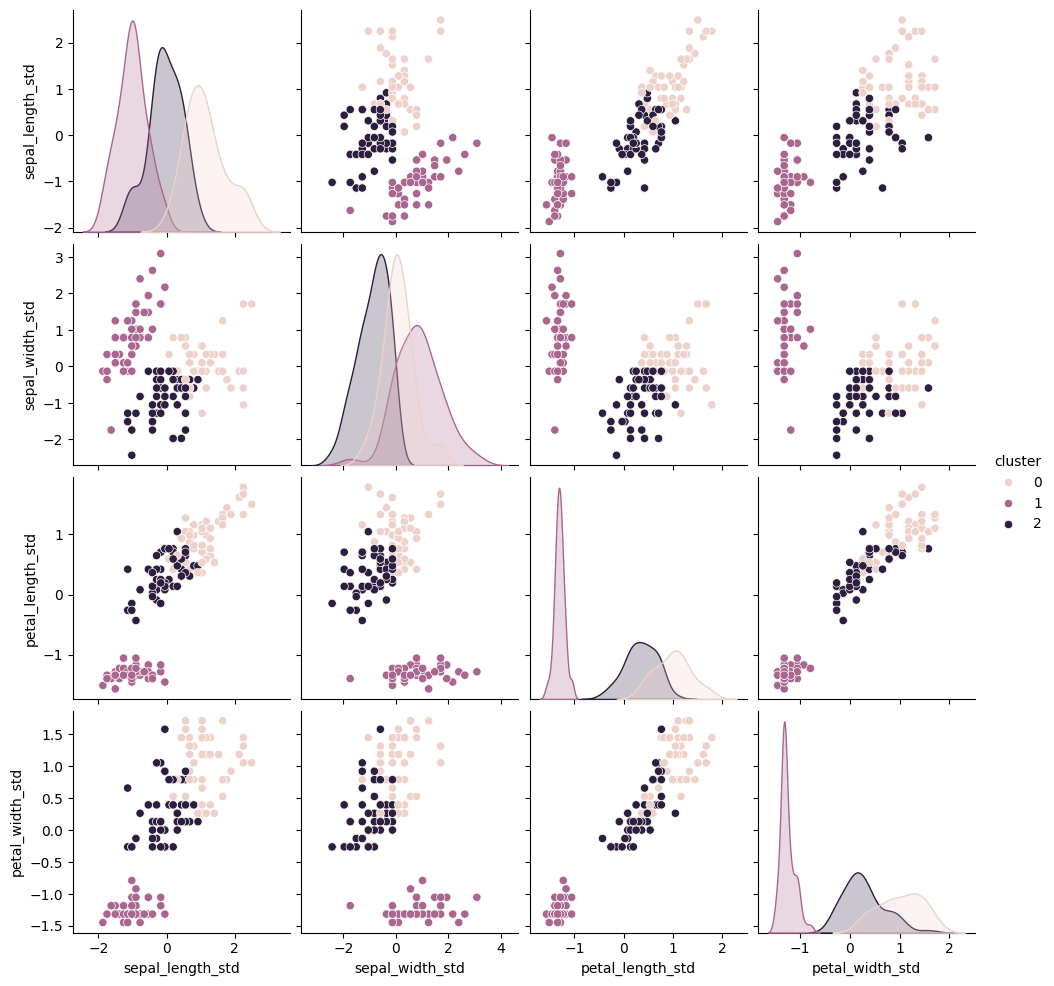

In [ ]:
# resposta da questão 3.3.b

# Visualizando o resultado
sns.pairplot(iris, hue='cluster')
plt.show()

**Comentário:**

- sepal_length: comprimento da sépala
- sepal_width: largura da sépala
- petal_length: comprimento da pétala
- petal_width: largura da pétala

-> Análise

- Na diagonal temos gráficos de densidades de distribuição, onde cada curva representa a distribuição da variável para um cluster específico; já os demais gráficos são pairplot incluindo clusters identificado por cores diferentes utilizando o K-Means;
- As variáveis estão com _std indicando que os dados foram normalizados;
- Cluster 2 (mais escuro): aparece mais separado dos demais nas variáveis de pétalas, sugerindo uma espécie distinta;
- Clusters 1 e 0 (mais claros): contam com muita sobreposição, indicando características semelhantes, encontramos uma característica um pouco mais clara em sepal_length_std e petal_width_std, o que talvez faça a distinção das espécies.



## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [19]:
# resposta da questão 4.1

# Nova flor (exemplo de dados)
new_flower = [[5.1, 3.5, 1.4, 0.2]]

# Pré-processando a nova flor
new_flower_std = scaler.transform(new_flower)

# Predição do cluster
new_cluster = kmeans.predict(new_flower_std)
print(f'A flor será alocada no cluster: {new_cluster[0]}')

A flor será alocada no cluster: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


---